# **Classificação com Árvore de Decisão**


https://www.kaggle.com/datasets/rever3nd/weather-data?resource=download


In [48]:
import pandas as pd
from sklearn import tree
import time
from sklearn.preprocessing import LabelEncoder
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
# Load the weather data from the CSV file
df = pd.read_csv("weather.csv")
df


,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,2013-03-09,Penrith,16.5,30.0,0.0,NaN,NaN,NE,26.0,...,41.0,NaN,NaN,NaN,NaN,21.6,29.4,No,0.0,No
24996,24996,2013-03-10,Penrith,16.7,30.5,0.0,NaN,NaN,NE,24.0,...,44.0,NaN,NaN,NaN,NaN,21.3,29.0,No,0.0,No
24997,24997,2013-03-11,Penrith,18.3,29.8,0.0,NaN,NaN,ENE,26.0,...,49.0,NaN,NaN,NaN,NaN,20.6,28.2,No,0.0,No
24998,24998,2013-03-12,Penrith,17.5,28.1,0.0,NaN,NaN,NNE,22.0,...,54.0,NaN,NaN,NaN,NaN,21.2,26.8,No,0.0,No


In [6]:
# Drop rows with missing values and reset the index
df = df.dropna().reset_index(drop=True)
df


,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
1,5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
2,5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
3,5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
4,5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6286,23195,2016-04-22,NorfolkIsland,19.6,24.3,0.0,5.0,9.1,E,37.0,...,65.0,1022.2,1018.9,1.0,5.0,23.3,22.4,No,0.0,No
6287,23196,2016-04-23,NorfolkIsland,16.5,24.1,0.0,5.4,5.8,ENE,31.0,...,87.0,1017.8,1014.7,7.0,7.0,22.2,21.9,No,2.4,Yes
6288,23197,2016-04-24,NorfolkIsland,20.3,25.6,2.4,1.4,5.2,NNW,39.0,...,85.0,1013.6,1011.5,7.0,7.0,22.7,23.6,Yes,7.4,Yes
6289,23198,2016-04-25,NorfolkIsland,18.3,23.7,7.4,3.4,6.6,ESE,56.0,...,73.0,1016.4,1015.8,5.0,4.0,21.9,22.8,Yes,6.6,Yes


In [7]:
# Prepare the input features by dropping irrelevant columns
inputs = df.drop(['RainTomorrow', 'Unnamed: 0', 'Location',
                 'WindGustDir', 'RainToday', 'WindDir9am'], axis='columns')
inputs


,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,2009-01-01,17.9,35.2,0.0,12.0,12.3,48.0,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0
1,2009-01-02,18.4,28.9,0.0,14.8,13.0,37.0,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0
2,2009-01-04,19.4,37.6,0.0,10.8,10.6,46.0,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0
3,2009-01-05,21.9,38.4,0.0,11.4,12.2,31.0,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0
4,2009-01-06,24.2,41.0,0.0,11.2,8.4,35.0,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6286,2016-04-22,19.6,24.3,0.0,5.0,9.1,37.0,E,19.0,26.0,60.0,65.0,1022.2,1018.9,1.0,5.0,23.3,22.4,0.0
6287,2016-04-23,16.5,24.1,0.0,5.4,5.8,31.0,ENE,15.0,19.0,68.0,87.0,1017.8,1014.7,7.0,7.0,22.2,21.9,2.4
6288,2016-04-24,20.3,25.6,2.4,1.4,5.2,39.0,WNW,15.0,15.0,90.0,85.0,1013.6,1011.5,7.0,7.0,22.7,23.6,7.4
6289,2016-04-25,18.3,23.7,7.4,3.4,6.6,56.0,ESE,17.0,20.0,83.0,73.0,1016.4,1015.8,5.0,4.0,21.9,22.8,6.6


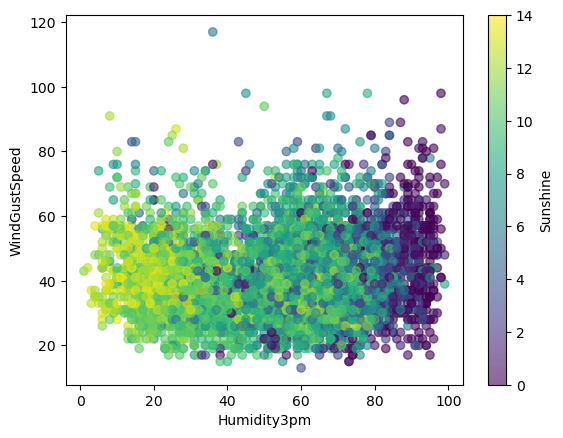

In [50]:
# Humidity3pm-WindGustSpeed-Sunshine
plt.scatter(df['Humidity3pm'], df['WindGustSpeed'], c=df['Sunshine'], alpha=0.6)
plt.colorbar(label='Sunshine')
plt.xlabel('Humidity3pm')
plt.ylabel('WindGustSpeed')
plt.show()

In [9]:
# Use LabelEncoder to encode categorical variables to numeric values
le_sex = LabelEncoder()
inputs = df.drop(['RainTomorrow', 'Unnamed: 0','RISK_MM'], axis='columns')
inputs['Location'] = le_sex.fit_transform(inputs['Location'])
inputs['WindGustDir'] = le_sex.fit_transform(inputs['WindGustDir'])
inputs['RainToday'] = le_sex.fit_transform(inputs['RainToday'])
inputs['WindDir9am'] = le_sex.fit_transform(inputs['WindDir9am'])
inputs['WindDir3pm'] = le_sex.fit_transform(inputs['WindDir3pm'])


# Convertendo a coluna 'data' para o tipo datetime
inputs['Date'] = pd.to_datetime(inputs['Date'])
# Convertendo a coluna 'data' para número usando o método astype
inputs['Date'] = inputs['Date'].astype(int)
inputs.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1230768000000000000,0,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
1,1230854400000000000,0,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
2,1231027200000000000,0,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
3,1231113600000000000,0,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
4,1231200000000000000,0,24.2,41.0,0.0,11.2,8.4,14,35.0,7,...,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0


In [10]:
# Prepare the target variable by encoding the 'RainTomorrow' column
target = le_sex.fit_transform(df['RainTomorrow'])
target


array([0, 0, 0, ..., 1, 1, 0])

In [42]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

# Create an instance of the DecisionTreeClassifier
model = tree.DecisionTreeClassifier(max_depth=22, min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=22)


# Treinar o modelo de árvore de decisão usando os dados de treinamento
start = time.time()
model.fit(X_train, y_train)
tempo = time.time() - start
print(tempo)


0.05388021469116211


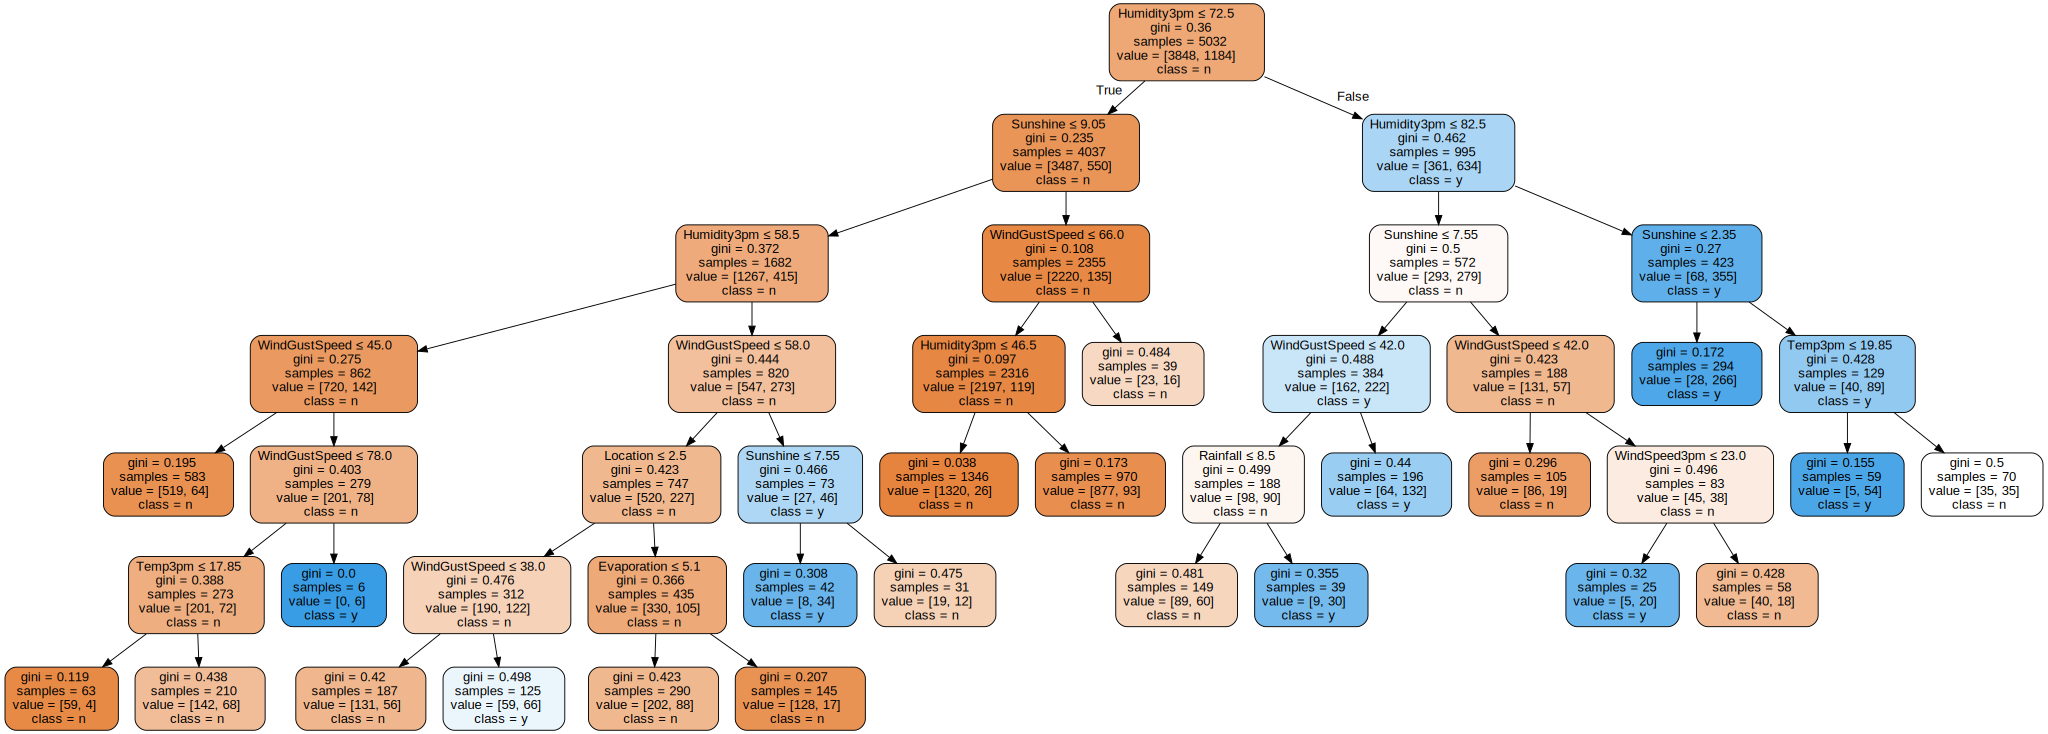

In [49]:
# Export the decision tree as a Graphviz object
feature_names = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
                 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
                 'Temp3pm', 'RainToday']

target_names = ['n', 'y']

dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.view()
graph


In [44]:
# Calcular a pontuação de precisão do modelo nos dados de teste
print("score:", model.score(X_test, y_test))

score: 0.8141382049245433
